In [1]:

# Level 2 – Task 1: Table Booking and Online Delivery Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("Dataset data science.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Step 1: Percentage of Restaurants with Table Booking

Table Booking Distribution:
 Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64

Percentage with Table Booking: 12.12%
Percentage without Table Booking: 87.88%


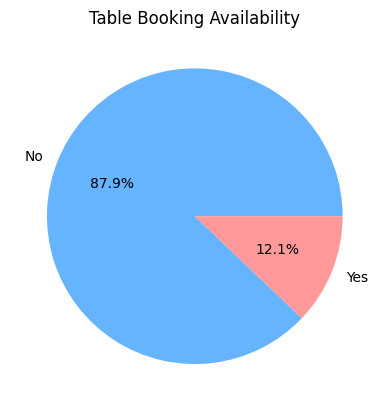

In [4]:
booking_counts = df['Has Table booking'].value_counts()
total = booking_counts.sum()

print("Table Booking Distribution:\n", booking_counts)
print("\nPercentage with Table Booking: {:.2f}%".format((booking_counts.get('Yes', 0) / total) * 100))
print("Percentage without Table Booking: {:.2f}%".format((booking_counts.get('No', 0) / total) * 100))

# Pie chart
booking_counts.plot.pie(autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'], title='Table Booking Availability')
plt.ylabel('')
plt.show()


## Step 2: Percentage of Restaurants with Online Delivery

Online Delivery Distribution:
 Is delivering now
No     9517
Yes      34
Name: count, dtype: int64

Percentage delivering now: 0.36%
Percentage not delivering now: 99.64%


C:\Users\imadi\AppData\Local\Temp\ipykernel_20652\2386135508.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("\nPercentage delivering now: {:.2f}%".format((delivery_counts.get(1, 0) / total_delivery) * 100))
C:\Users\imadi\AppData\Local\Temp\ipykernel_20652\2386135508.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Percentage not delivering now: {:.2f}%".format((delivery_counts.get(0, 0) / total_delivery) * 100))
C:\Users\imadi\AppData\Local\Temp\ipykernel_20652\2386135508.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will alw

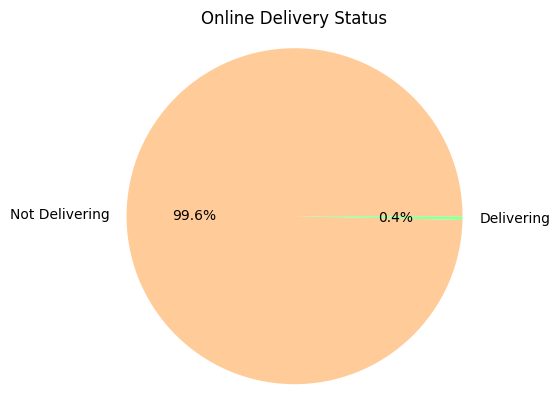

In [5]:
delivery_counts = df['Is delivering now'].value_counts()
total_delivery = delivery_counts.sum()

print("Online Delivery Distribution:\n", delivery_counts)
print("\nPercentage delivering now: {:.2f}%".format((delivery_counts.get(1, 0) / total_delivery) * 100))
print("Percentage not delivering now: {:.2f}%".format((delivery_counts.get(0, 0) / total_delivery) * 100))

# Pie chart
labels = ['Not Delivering', 'Delivering']
sizes = [delivery_counts.get(0, 0), delivery_counts.get(1, 0)]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#ffcc99', '#99ff99'])
plt.title("Online Delivery Status")
plt.axis('equal')
plt.show()

## Step 3: Compare Ratings - Table Booking vs No Booking

Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


C:\Users\imadi\AppData\Local\Temp\ipykernel_20652\2810437602.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratings_booking.index, y=ratings_booking.values, palette='Set2')


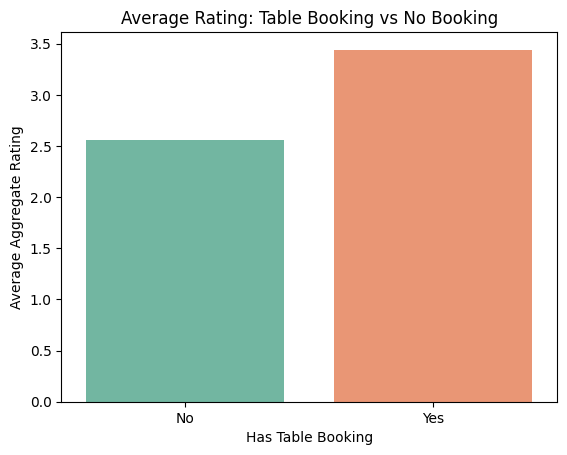

In [6]:
ratings_booking = df.groupby('Has Table booking')['Aggregate rating'].mean()
print(ratings_booking)

sns.barplot(x=ratings_booking.index, y=ratings_booking.values, palette='Set2')
plt.title("Average Rating: Table Booking vs No Booking")
plt.ylabel("Average Aggregate Rating")
plt.xlabel("Has Table Booking")
plt.show()


## Step 4: Online Delivery Availability by Price Range

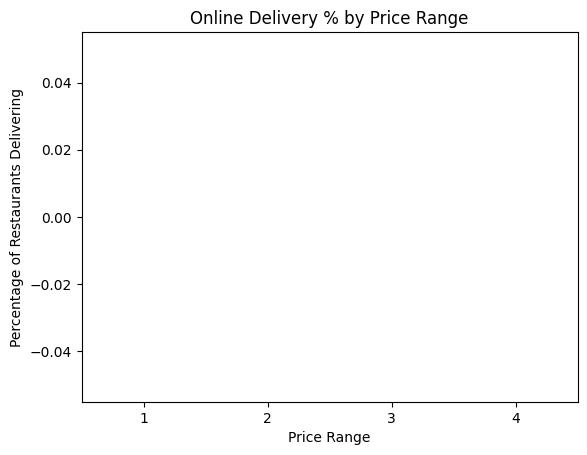

In [7]:
delivery_by_price = df[df['Is delivering now'] == 1].groupby('Price range')['Restaurant Name'].count()
total_by_price = df.groupby('Price range')['Restaurant Name'].count()

delivery_percentage = (delivery_by_price / total_by_price) * 100
delivery_percentage = delivery_percentage.fillna(0)

delivery_percentage.plot(kind='bar', color='coral')
plt.title("Online Delivery % by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Percentage of Restaurants Delivering")
plt.xticks(rotation=0)
plt.show()
